In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req 
import time
import json
from pprint import pprint 
from citipy import citipy

# Census & gmaps API Keys
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=81d56a68279f9e17e16f97b76348e79a&units=Imperial&q='

In [4]:
# set up lists to hold response info
weather_data = []
temp = []
humidity = []
clouds = []
wind = []
lat = []
new_city = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    try:
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        new_city.append(city)
        
    except KeyError:

        time.sleep(1.1)

In [19]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "name": new_city,
    "lat": lat,
    "temp_max": temp,
    "winds": wind,
    "clouds": clouds,
    "humidity": humidity
}

weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.head()

,name,lat,temp_max,winds,clouds,humidity
0,saint-philippe,45.36,31.30,4.70,75,89
1,punta arenas,-53.16,51.80,28.86,75,53
2,albany,42.65,34.77,5.73,75,75
3,rikitea,-23.12,77.86,15.68,24,98
4,san jeronimo,-13.65,36.78,1.70,24,51


In [22]:
# Save as a csv
weather_data_df.to_csv("web_vis.csv", encoding="utf-8", index=False)

weather_data_df = pd.read_csv("web_vis.csv")
weather_data_df.head()

,name,lat,temp_max,winds,clouds,humidity
0,saint-philippe,45.36,31.30,4.70,75,89
1,punta arenas,-53.16,51.80,28.86,75,53
2,albany,42.65,34.77,5.73,75,75
3,rikitea,-23.12,77.86,15.68,24,98
4,san jeronimo,-13.65,36.78,1.70,24,51


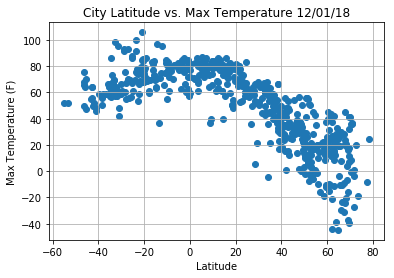

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 12/01/18")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

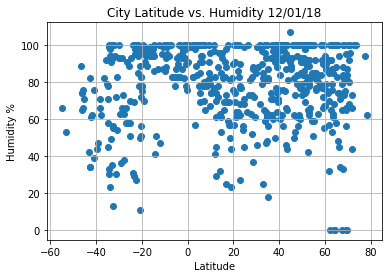

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 12/01/18")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude_vs_Humidity.png")

# Show plot
plt.show()

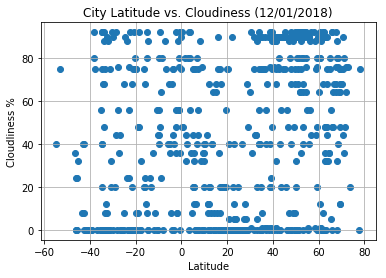

In [10]:
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (12/01/2018)")
plt.ylabel("Cloudliness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudlinessInWorldCities.png")

# Show plot
plt.show()

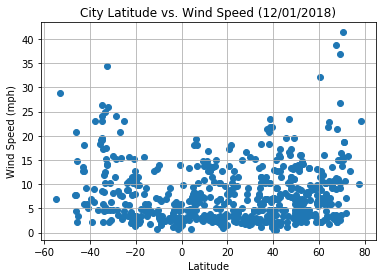

In [11]:
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (12/01/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()

In [23]:
weather_data_df.to_csv("web_vis.csv", encoding="utf-8", index=False)